In [56]:
import pandas as pd 
from catboost import CatBoostClassifier, Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import lightgbm as lgb

In [8]:
X = pd.read_parquet("../data/processed/train_data/train.gzip")
y = pd.read_parquet("../data/processed/train_data/train_target.gzip")

In [9]:
for column in X.columns:
    if X[column].isnull().values.any():
        print(column, X[column].isnull().sum(), X[column].isnull().sum()/X.shape[0])

## Modele de classification

In [13]:
y_retard = y[["RETARD A L'ARRIVEE"]]
y = y[["RETARD"]]

,RETARD
0,0
1,0
2,0
3,1
4,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
cat_features = [0,1,6,10,12,13,14,15]

In [19]:
sum_neg = y_train[y_train["RETARD"]==0].shape[0]
sum_pos = y_train[y_train["RETARD"]==1].shape[0]

In [20]:
model = CatBoostClassifier(iterations=500, 
                           learning_rate=0.03, 
                           eval_metric="Recall",
                           depth=10,
                           random_seed=0, 
                           auto_class_weights="Balanced")

In [21]:
model.fit(X_train, y_train, cat_features)
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

0:	learn: 0.6325426	total: 3.15s	remaining: 26m 10s
1:	learn: 0.6079504	total: 5.45s	remaining: 22m 37s
2:	learn: 0.6060866	total: 7.47s	remaining: 20m 38s
3:	learn: 0.5936277	total: 9.72s	remaining: 20m 5s
4:	learn: 0.5925514	total: 11.7s	remaining: 19m 21s
5:	learn: 0.5890513	total: 13.7s	remaining: 18m 50s
6:	learn: 0.5907223	total: 15.9s	remaining: 18m 42s
7:	learn: 0.5929983	total: 18.1s	remaining: 18m 33s
8:	learn: 0.5922258	total: 20.3s	remaining: 18m 26s
9:	learn: 0.5864577	total: 22.4s	remaining: 18m 15s
10:	learn: 0.5877210	total: 24.4s	remaining: 18m 3s
11:	learn: 0.5861401	total: 26.4s	remaining: 17m 52s
12:	learn: 0.5854981	total: 28.5s	remaining: 17m 48s
13:	learn: 0.5864646	total: 30.7s	remaining: 17m 46s
14:	learn: 0.5855616	total: 32.8s	remaining: 17m 39s
15:	learn: 0.5859946	total: 35.1s	remaining: 17m 41s
16:	learn: 0.5835800	total: 37.1s	remaining: 17m 32s
17:	learn: 0.5868803	total: 39.6s	remaining: 17m 41s
18:	learn: 0.5841666	total: 41.9s	remaining: 17m 41s
19:	l

153:	learn: 0.6594905	total: 6m 45s	remaining: 15m 11s
154:	learn: 0.6597145	total: 6m 48s	remaining: 15m 8s
155:	learn: 0.6599432	total: 6m 51s	remaining: 15m 6s
156:	learn: 0.6602815	total: 6m 54s	remaining: 15m 6s
157:	learn: 0.6605448	total: 6m 57s	remaining: 15m 4s
158:	learn: 0.6607538	total: 7m	remaining: 15m 2s
159:	learn: 0.6610725	total: 7m 3s	remaining: 15m
160:	learn: 0.6611857	total: 7m 6s	remaining: 14m 58s
161:	learn: 0.6613982	total: 7m 9s	remaining: 14m 56s
162:	learn: 0.6615806	total: 7m 12s	remaining: 14m 53s
163:	learn: 0.6617030	total: 7m 14s	remaining: 14m 49s
164:	learn: 0.6617977	total: 7m 16s	remaining: 14m 47s
165:	learn: 0.6619167	total: 7m 20s	remaining: 14m 45s
166:	learn: 0.6621072	total: 7m 22s	remaining: 14m 42s
167:	learn: 0.6624132	total: 7m 25s	remaining: 14m 40s
168:	learn: 0.6623728	total: 7m 27s	remaining: 14m 37s
169:	learn: 0.6625276	total: 7m 31s	remaining: 14m 35s
170:	learn: 0.6626592	total: 7m 34s	remaining: 14m 34s
171:	learn: 0.6626430	tota

303:	learn: 0.6740973	total: 13m 5s	remaining: 8m 26s
304:	learn: 0.6741573	total: 13m 7s	remaining: 8m 23s
305:	learn: 0.6742162	total: 13m 10s	remaining: 8m 21s
306:	learn: 0.6742728	total: 13m 12s	remaining: 8m 18s
307:	learn: 0.6743398	total: 13m 15s	remaining: 8m 15s
308:	learn: 0.6744056	total: 13m 17s	remaining: 8m 12s
309:	learn: 0.6744021	total: 13m 19s	remaining: 8m 10s
310:	learn: 0.6744587	total: 13m 22s	remaining: 8m 7s
311:	learn: 0.6744784	total: 13m 24s	remaining: 8m 4s
312:	learn: 0.6745095	total: 13m 27s	remaining: 8m 2s
313:	learn: 0.6744876	total: 13m 30s	remaining: 7m 59s
314:	learn: 0.6745188	total: 13m 32s	remaining: 7m 57s
315:	learn: 0.6745754	total: 13m 34s	remaining: 7m 54s
316:	learn: 0.6746239	total: 13m 36s	remaining: 7m 51s
317:	learn: 0.6746158	total: 13m 39s	remaining: 7m 49s
318:	learn: 0.6746862	total: 13m 41s	remaining: 7m 46s
319:	learn: 0.6747139	total: 13m 44s	remaining: 7m 43s
320:	learn: 0.6748109	total: 13m 47s	remaining: 7m 41s
321:	learn: 0.6

454:	learn: 0.6784704	total: 19m 38s	remaining: 1m 56s
455:	learn: 0.6784785	total: 19m 40s	remaining: 1m 53s
456:	learn: 0.6785143	total: 19m 43s	remaining: 1m 51s
457:	learn: 0.6785293	total: 19m 45s	remaining: 1m 48s
458:	learn: 0.6785432	total: 19m 48s	remaining: 1m 46s
459:	learn: 0.6785443	total: 19m 50s	remaining: 1m 43s
460:	learn: 0.6785108	total: 19m 53s	remaining: 1m 40s
461:	learn: 0.6785328	total: 19m 55s	remaining: 1m 38s
462:	learn: 0.6785755	total: 19m 58s	remaining: 1m 35s
463:	learn: 0.6785778	total: 20m	remaining: 1m 33s
464:	learn: 0.6785767	total: 20m 2s	remaining: 1m 30s
465:	learn: 0.6785778	total: 20m 4s	remaining: 1m 27s
466:	learn: 0.6786240	total: 20m 6s	remaining: 1m 25s
467:	learn: 0.6786032	total: 20m 8s	remaining: 1m 22s
468:	learn: 0.6786517	total: 20m 12s	remaining: 1m 20s
469:	learn: 0.6787095	total: 20m 15s	remaining: 1m 17s
470:	learn: 0.6787014	total: 20m 17s	remaining: 1m 14s
471:	learn: 0.6787279	total: 20m 20s	remaining: 1m 12s
472:	learn: 0.6787

In [22]:
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    373327
           1       0.64      0.68      0.66    216116

    accuracy                           0.74    589443
   macro avg       0.72      0.73      0.73    589443
weighted avg       0.75      0.74      0.74    589443



In [23]:
print(confusion_matrix(y_test, preds_class))

[[290341  82986]
 [ 68908 147208]]


In [24]:
preds_class

array([0, 1, 0, ..., 0, 0, 1])

In [25]:
preds_proba

array([[0.57461997, 0.42538003],
       [0.07162075, 0.92837925],
       [0.59216764, 0.40783236],
       ...,
       [0.75654065, 0.24345935],
       [0.57115002, 0.42884998],
       [0.19539452, 0.80460548]])

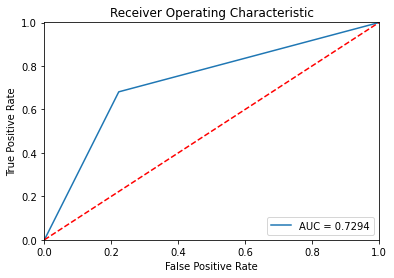

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, preds_class)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [27]:
df = pd.DataFrame()

In [28]:
df[X_test.columns] = X_test

In [29]:
predictions = []
for i in range(preds_proba.shape[0]):
    predictions.append(preds_proba[i][1])
predictions

[0.42538002777934864,
 0.9283792514567069,
 0.40783236146410357,
 0.33936153896802645,
 0.23076893322018324,
 0.18372666508543778,
 0.21792234901673058,
 0.5594539427297078,
 0.23622546422962798,
 0.7654892183134557,
 0.24139683770709358,
 0.10148102657219382,
 0.984996413081859,
 0.17644052856192166,
 0.5463209941456164,
 0.3524816134913823,
 0.4498955806953592,
 0.3797688974435766,
 0.21150539146832803,
 0.2123813425227372,
 0.14392688245661614,
 0.4093933570272659,
 0.375731233114124,
 0.9344981555403589,
 0.6000645805636803,
 0.39911350216012215,
 0.15624764196443983,
 0.2071062044643302,
 0.9152793488001605,
 0.27493191026300584,
 0.507879432680929,
 0.803504198872775,
 0.23718283001319396,
 0.297017143289186,
 0.6682234091435473,
 0.37619497499628407,
 0.7208822526294754,
 0.5918791197863379,
 0.12281479395109925,
 0.9651787562984327,
 0.5971905968524525,
 0.4996155824361711,
 0.3036000381402109,
 0.620833411386078,
 0.2142723428030694,
 0.6507827295008903,
 0.8353178019156113,
 

In [30]:
df["RETARD PREDIT"] = predictions
df.head()

,AEROPORT DEPART,AEROPORT ARRIVEE,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,TEMPS PROGRAMME,DISTANCE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,COMPAGNIE AERIENNE,NOMBRE DE PASSAGERS,DEPART DE NUIT,ARRIVEE DE NUIT,DAY OF THE WEEK,WEEKEND,MONTH,DAY OF THE MONTH,HEURE DE DEPART,HEURE D'ARRIVEE,RETARD PREDIT
2323304,LJU,BRU,10.0,314.0,2504,6.0,THA,308,0,1,2,0,12,18,21,5,0.425380
817292,AGP,COK,32.0,69.0,270,4.0,NVPPA,2499,0,0,2,0,5,8,21,22,0.928379
1929654,KWL,AAL,23.0,191.0,1029,4.0,NVPPA,1251,0,0,2,0,2,13,10,13,0.407832
372580,AGP,TNA,22.0,77.0,226,7.0,NVPPA,246,0,0,4,0,4,27,8,10,0.339362
2612602,SXF,UPG,11.0,310.0,2442,8.0,BTATA,133,0,0,3,0,7,19,8,16,0.230769


In [31]:
thresh = 0.2
def calculate_prediction(x, thresh):
    if x <= thresh:
        return 0
    else : 
        return 1
df["RETARD"] = df["RETARD PREDIT"].apply(lambda x: calculate_prediction(x))
df.head()

,AEROPORT DEPART,AEROPORT ARRIVEE,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,TEMPS PROGRAMME,DISTANCE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,COMPAGNIE AERIENNE,NOMBRE DE PASSAGERS,DEPART DE NUIT,ARRIVEE DE NUIT,DAY OF THE WEEK,WEEKEND,MONTH,DAY OF THE MONTH,HEURE DE DEPART,HEURE D'ARRIVEE,RETARD PREDIT,RETARD
2323304,LJU,BRU,10.0,314.0,2504,6.0,THA,308,0,1,2,0,12,18,21,5,0.425380,1
817292,AGP,COK,32.0,69.0,270,4.0,NVPPA,2499,0,0,2,0,5,8,21,22,0.928379,1
1929654,KWL,AAL,23.0,191.0,1029,4.0,NVPPA,1251,0,0,2,0,2,13,10,13,0.407832,1
372580,AGP,TNA,22.0,77.0,226,7.0,NVPPA,246,0,0,4,0,4,27,8,10,0.339362,1
2612602,SXF,UPG,11.0,310.0,2442,8.0,BTATA,133,0,0,3,0,7,19,8,16,0.230769,1


In [32]:
print(classification_report(y_test, df["RETARD"]))

              precision    recall  f1-score   support

           0       0.92      0.22      0.36    373327
           1       0.42      0.97      0.58    216116

    accuracy                           0.49    589443
   macro avg       0.67      0.59      0.47    589443
weighted avg       0.73      0.49      0.44    589443



# INTERPRETATION WITH SHAP

In [40]:
import shap 

In [42]:
%time 
shap_values = shap.TreeExplainer(model).shap_values(X_test)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [138]:
shap_values[0]

array([ 1.91295906e+00,  1.17307141e+01,  1.49448763e+00,  7.16417519e-01,
        8.97687891e-01, -2.81719096e-01, -4.40595364e-02,  4.62166143e+00,
       -9.06836525e-03, -1.25341957e-02,  1.56657049e+00, -2.65910357e-02,
        2.73171276e-01,  3.83416007e+00,  1.08703541e+00,  7.96171441e-01])

AssertionError: Feature and SHAP matrices must have the same number of rows!

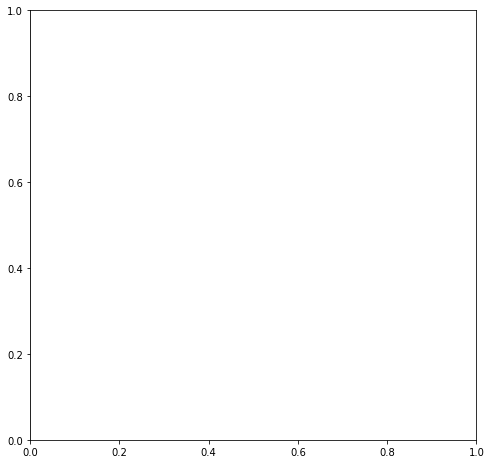

In [140]:
shap.summary_plot(shap_values, X_test)

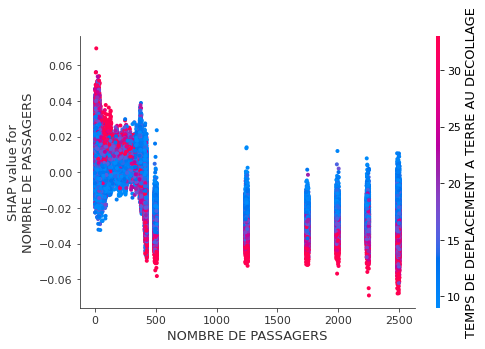

In [44]:
shap.dependence_plot("NOMBRE DE PASSAGERS", shap_values, X_test)

In [ ]:
shap.dependence_plot("TEMPS PROGRAMME", shap_values, X_test)

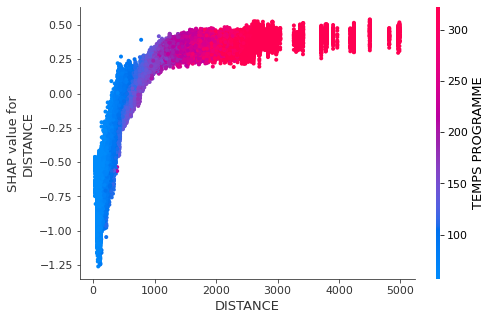

In [46]:
shap.dependence_plot("DISTANCE", shap_values, X_test)

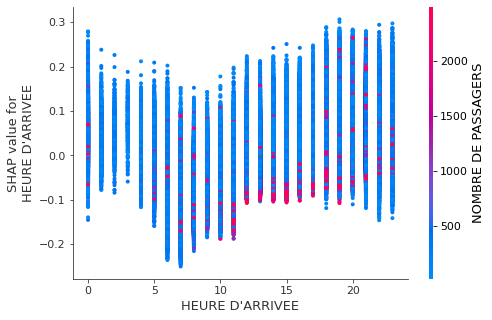

In [47]:
shap.dependence_plot("HEURE D'ARRIVEE", shap_values, X_test)

## Modèle de régression

In [57]:
y_retard = y_retard[y_retard["RETARD A L'ARRIVEE"]>10]
y_retard.head()

,RETARD A L'ARRIVEE
0,45.0
1,144.0
2,158.0
3,14.0
4,22.0


In [58]:
indexes = y_retard.index

In [59]:
indexes_deleted = X.index.difference(indexes)
indexes_deleted

Int64Index([ 659331,  659332,  659333,  659334,  659335,  659336,  659337,
             659338,  659339,  659340,
            ...
            2947205, 2947206, 2947207, 2947208, 2947209, 2947210, 2947211,
            2947212, 2947213, 2947214],
           dtype='int64', length=2287884)

In [60]:
X_retard = X.drop(indexes_deleted)
X_retard.head()

,AEROPORT DEPART,AEROPORT ARRIVEE,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE,TEMPS PROGRAMME,DISTANCE,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE,COMPAGNIE AERIENNE,NOMBRE DE PASSAGERS,DEPART DE NUIT,ARRIVEE DE NUIT,DAY OF THE WEEK,WEEKEND,MONTH,DAY OF THE MONTH,HEURE DE DEPART,HEURE D'ARRIVEE
0,CEB,AAL,20.0,67.0,232,6.0,MAF,379,0,0,3,0,8,15,17,18
1,GOI,LTK,11.0,130.0,738,17.0,I6F,9,1,0,4,0,2,11,6,9
2,DSS,JNB,9.0,248.0,1671,4.0,NVPPA,2491,0,0,3,0,9,6,17,18
3,AGP,GOA,19.0,65.0,214,11.0,NVPPA,1241,1,1,6,1,5,26,23,0
4,BRU,BOD,13.0,302.0,2288,8.0,THA,78,0,0,4,0,10,11,6,14


In [61]:
X_retard = X_retard.reset_index(drop=True)
y_retard = y_retard.reset_index(drop=True)

In [62]:
cat_features = [0,1,6,10,12,13,14,15]

for i in cat_features:
    X_retard.iloc[:,i] = X_retard.iloc[:,i].astype('category')

In [63]:
X_train_retard, X_test_retard, y_train_retard, y_test_retard = train_test_split(X_retard,
                                                                                y_retard, 
                                                                                test_size=0.2,
                                                                                random_state=42)

In [64]:
clf = lgb.LGBMRegressor(num_leaves=50, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=2000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.05)

In [65]:
clf.fit(X_train_retard, y_train_retard)
preds_class = clf.predict(X_test_retard)

In [66]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test_retard, preds_class))

In [67]:
mean_squared_error(y_test_retard, preds_class)

4307.92216389136

In [68]:
rmse

65.63476337956403

In [69]:
df_retard = pd.DataFrame()

In [70]:
df_retard["RETARD"] = y_test_retard["RETARD A L'ARRIVEE"]
df_retard["RETARD PREDIT"] = preds_class
df_retard.head()

,RETARD,RETARD PREDIT
293334,24.0,82.303044
391429,37.0,42.689165
273348,14.0,53.620704
427805,137.0,49.721276
449866,40.0,72.690188


In [71]:
data = Pool(data=X_train, cat_features=cat_features)
pd.DataFrame({'feature_importance': model.get_feature_importance(data), 
              'feature_names': X_test.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

,feature_importance,feature_names
2,27.327527,TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE
5,12.057765,TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE
13,9.512588,DAY OF THE MONTH
12,8.669552,MONTH
0,7.599409,AEROPORT DEPART
6,7.349061,COMPAGNIE AERIENNE
3,7.131547,TEMPS PROGRAMME
1,6.931906,AEROPORT ARRIVEE
14,5.169115,HEURE DE DEPART
4,4.292732,DISTANCE


In [72]:
def crossvaltest(params,train_set,train_label,cat_dims,n_splits=3):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_set):
        train = train_set.iloc[train_index,:]
        test = train_set.iloc[test_index,:]

        labels = train_label.iloc[train_index]
        test_labels = train_label.iloc[test_index]

        model = CatBoostClassifier(**params)
        model.fit(train, np.ravel(labels), cat_features=cat_dims)

        #res.append(np.mean(clf.predict(test)==np.ravel(test_labels)))
        res.append(recall(test_labels, model.predict(test)))
    return np.mean(res)

In [73]:
params ={'learning_rate': 0.03,
        'depth': 10,
        'iterations': 1000, 
        'random_seed': 0, 
        'auto_class_weights': "Balanced"}

In [74]:
crossvaltest(params, X, y, cat_features)

0:	learn: 0.6874958	total: 2.45s	remaining: 40m 47s
1:	learn: 0.6822238	total: 4.4s	remaining: 36m 37s
2:	learn: 0.6772778	total: 6.73s	remaining: 37m 18s
3:	learn: 0.6727235	total: 9.11s	remaining: 37m 47s
4:	learn: 0.6684770	total: 12.6s	remaining: 41m 45s
5:	learn: 0.6644054	total: 15.4s	remaining: 42m 37s
6:	learn: 0.6609136	total: 17.9s	remaining: 42m 22s
7:	learn: 0.6572925	total: 21.6s	remaining: 44m 44s
8:	learn: 0.6540221	total: 24.9s	remaining: 45m 36s
9:	learn: 0.6511399	total: 27.8s	remaining: 45m 50s
10:	learn: 0.6478049	total: 31.3s	remaining: 46m 53s
11:	learn: 0.6450810	total: 33.9s	remaining: 46m 28s
12:	learn: 0.6424451	total: 36.4s	remaining: 46m 1s
13:	learn: 0.6400127	total: 39s	remaining: 45m 48s
14:	learn: 0.6374399	total: 41.8s	remaining: 45m 46s
15:	learn: 0.6354107	total: 44.5s	remaining: 45m 38s
16:	learn: 0.6328898	total: 48s	remaining: 46m 15s
17:	learn: 0.6310466	total: 51.4s	remaining: 46m 43s
18:	learn: 0.6288424	total: 54.7s	remaining: 47m 6s
19:	learn:

153:	learn: 0.5580677	total: 8m 48s	remaining: 48m 21s
154:	learn: 0.5579656	total: 8m 52s	remaining: 48m 23s
155:	learn: 0.5577254	total: 8m 56s	remaining: 48m 23s
156:	learn: 0.5576210	total: 8m 59s	remaining: 48m 18s
157:	learn: 0.5575089	total: 9m 4s	remaining: 48m 22s
158:	learn: 0.5574169	total: 9m 10s	remaining: 48m 33s
159:	learn: 0.5573221	total: 9m 15s	remaining: 48m 37s
160:	learn: 0.5571588	total: 9m 19s	remaining: 48m 35s
161:	learn: 0.5569866	total: 9m 23s	remaining: 48m 33s
162:	learn: 0.5568557	total: 9m 27s	remaining: 48m 33s
163:	learn: 0.5566555	total: 9m 32s	remaining: 48m 35s
164:	learn: 0.5564292	total: 9m 35s	remaining: 48m 32s
165:	learn: 0.5562208	total: 9m 37s	remaining: 48m 23s
166:	learn: 0.5560357	total: 9m 40s	remaining: 48m 15s
167:	learn: 0.5559634	total: 9m 43s	remaining: 48m 9s
168:	learn: 0.5557982	total: 9m 46s	remaining: 48m 4s
169:	learn: 0.5557428	total: 9m 49s	remaining: 47m 59s
170:	learn: 0.5556682	total: 9m 53s	remaining: 47m 56s
171:	learn: 0

301:	learn: 0.5444446	total: 18m 7s	remaining: 41m 54s
302:	learn: 0.5443633	total: 18m 11s	remaining: 41m 50s
303:	learn: 0.5443214	total: 18m 14s	remaining: 41m 46s
304:	learn: 0.5442253	total: 18m 18s	remaining: 41m 43s
305:	learn: 0.5441765	total: 18m 22s	remaining: 41m 39s
306:	learn: 0.5441234	total: 18m 25s	remaining: 41m 34s
307:	learn: 0.5440801	total: 18m 28s	remaining: 41m 30s
308:	learn: 0.5439960	total: 18m 32s	remaining: 41m 27s
309:	learn: 0.5439272	total: 18m 36s	remaining: 41m 24s
310:	learn: 0.5438869	total: 18m 40s	remaining: 41m 22s
311:	learn: 0.5438020	total: 18m 44s	remaining: 41m 20s
312:	learn: 0.5436908	total: 18m 48s	remaining: 41m 16s
313:	learn: 0.5436493	total: 18m 53s	remaining: 41m 15s
314:	learn: 0.5436004	total: 18m 56s	remaining: 41m 12s
315:	learn: 0.5435530	total: 19m 1s	remaining: 41m 11s
316:	learn: 0.5434764	total: 19m 6s	remaining: 41m 9s
317:	learn: 0.5434078	total: 19m 11s	remaining: 41m 8s
318:	learn: 0.5433399	total: 19m 14s	remaining: 41m 5

449:	learn: 0.5379318	total: 27m 34s	remaining: 33m 41s
450:	learn: 0.5379041	total: 27m 37s	remaining: 33m 38s
451:	learn: 0.5378713	total: 27m 40s	remaining: 33m 33s
452:	learn: 0.5378326	total: 27m 44s	remaining: 33m 29s
453:	learn: 0.5378096	total: 27m 47s	remaining: 33m 25s
454:	learn: 0.5377913	total: 27m 51s	remaining: 33m 22s
455:	learn: 0.5377311	total: 27m 56s	remaining: 33m 19s
456:	learn: 0.5377072	total: 28m	remaining: 33m 16s
457:	learn: 0.5376707	total: 28m 4s	remaining: 33m 13s
458:	learn: 0.5376445	total: 28m 7s	remaining: 33m 9s
459:	learn: 0.5375911	total: 28m 13s	remaining: 33m 7s
460:	learn: 0.5375530	total: 28m 19s	remaining: 33m 6s
461:	learn: 0.5375327	total: 28m 23s	remaining: 33m 3s
462:	learn: 0.5374935	total: 28m 29s	remaining: 33m 2s
463:	learn: 0.5374507	total: 28m 34s	remaining: 33m
464:	learn: 0.5374214	total: 28m 39s	remaining: 32m 57s
465:	learn: 0.5373855	total: 28m 43s	remaining: 32m 54s
466:	learn: 0.5373654	total: 28m 47s	remaining: 32m 51s
467:	le

597:	learn: 0.5334139	total: 36m 9s	remaining: 24m 18s
598:	learn: 0.5333838	total: 36m 13s	remaining: 24m 14s
599:	learn: 0.5333451	total: 36m 16s	remaining: 24m 10s
600:	learn: 0.5333183	total: 36m 19s	remaining: 24m 6s
601:	learn: 0.5332924	total: 36m 21s	remaining: 24m 2s
602:	learn: 0.5332408	total: 36m 25s	remaining: 23m 58s
603:	learn: 0.5332141	total: 36m 27s	remaining: 23m 54s
604:	learn: 0.5331894	total: 36m 30s	remaining: 23m 50s
605:	learn: 0.5331590	total: 36m 33s	remaining: 23m 45s
606:	learn: 0.5331401	total: 36m 35s	remaining: 23m 41s
607:	learn: 0.5331221	total: 36m 38s	remaining: 23m 37s
608:	learn: 0.5330811	total: 36m 41s	remaining: 23m 33s
609:	learn: 0.5330576	total: 36m 44s	remaining: 23m 29s
610:	learn: 0.5330308	total: 36m 47s	remaining: 23m 25s
611:	learn: 0.5329962	total: 36m 50s	remaining: 23m 21s
612:	learn: 0.5329687	total: 36m 53s	remaining: 23m 17s
613:	learn: 0.5329374	total: 36m 56s	remaining: 23m 13s
614:	learn: 0.5328931	total: 36m 58s	remaining: 23m

745:	learn: 0.5296639	total: 43m 56s	remaining: 14m 57s
746:	learn: 0.5296388	total: 43m 59s	remaining: 14m 54s
747:	learn: 0.5296133	total: 44m 3s	remaining: 14m 50s
748:	learn: 0.5295741	total: 44m 6s	remaining: 14m 47s
749:	learn: 0.5295544	total: 44m 10s	remaining: 14m 43s
750:	learn: 0.5295370	total: 44m 13s	remaining: 14m 39s
751:	learn: 0.5295195	total: 44m 16s	remaining: 14m 36s
752:	learn: 0.5294890	total: 44m 20s	remaining: 14m 32s
753:	learn: 0.5294650	total: 44m 23s	remaining: 14m 28s
754:	learn: 0.5294464	total: 44m 26s	remaining: 14m 25s
755:	learn: 0.5294228	total: 44m 29s	remaining: 14m 21s
756:	learn: 0.5294043	total: 44m 32s	remaining: 14m 17s
757:	learn: 0.5293841	total: 44m 35s	remaining: 14m 14s
758:	learn: 0.5293625	total: 44m 38s	remaining: 14m 10s
759:	learn: 0.5293420	total: 44m 41s	remaining: 14m 6s
760:	learn: 0.5293139	total: 44m 45s	remaining: 14m 3s
761:	learn: 0.5292994	total: 44m 48s	remaining: 13m 59s
762:	learn: 0.5292751	total: 44m 51s	remaining: 13m 

894:	learn: 0.5266283	total: 54m 8s	remaining: 6m 21s
895:	learn: 0.5266136	total: 54m 13s	remaining: 6m 17s
896:	learn: 0.5265948	total: 54m 18s	remaining: 6m 14s
897:	learn: 0.5265806	total: 54m 23s	remaining: 6m 10s
898:	learn: 0.5265567	total: 54m 27s	remaining: 6m 7s
899:	learn: 0.5265432	total: 54m 30s	remaining: 6m 3s
900:	learn: 0.5265316	total: 54m 34s	remaining: 5m 59s
901:	learn: 0.5265133	total: 54m 38s	remaining: 5m 56s
902:	learn: 0.5264997	total: 54m 41s	remaining: 5m 52s
903:	learn: 0.5264841	total: 54m 45s	remaining: 5m 48s
904:	learn: 0.5264560	total: 54m 48s	remaining: 5m 45s
905:	learn: 0.5264391	total: 54m 51s	remaining: 5m 41s
906:	learn: 0.5264193	total: 54m 55s	remaining: 5m 37s
907:	learn: 0.5264031	total: 54m 58s	remaining: 5m 34s
908:	learn: 0.5263811	total: 55m 3s	remaining: 5m 30s
909:	learn: 0.5263443	total: 55m 8s	remaining: 5m 27s
910:	learn: 0.5263242	total: 55m 12s	remaining: 5m 23s
911:	learn: 0.5263070	total: 55m 15s	remaining: 5m 19s
912:	learn: 0.5

NameError: name 'recall' is not defined

In [ ]:
params = {'learning_rate': [0.03, 0.05, 0.1],
        'depth': [5, 10, 20],
        'iterations': [50, 100, 200, 1000], 
        'random_seed': [0], 
        'auto_class_weights': ["Balanced"]}

<AxesSubplot:title={'center':'Featur Importance'}, xlabel='Feature importance', ylabel='Features'>

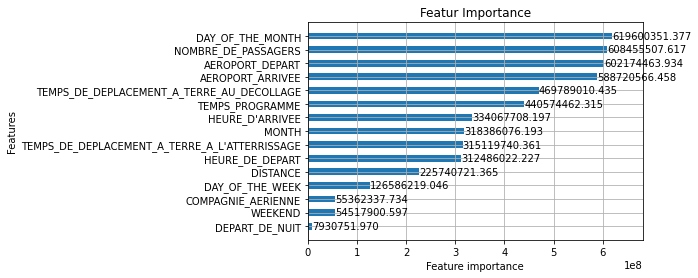

In [87]:
lgb.plot_importance(clf, height=0.5, importance_type='gain', 
                    max_num_features=15, title= "Featur Importance")

# Shap interpretation 

Nous utilisons un diagramme de dispersion de densité des valeurs SHAP pour chaque feature afin d'identifier l'impact de chaque feature sur la sortie du modèle pour les individus de l'ensemble de données de test. Les features sont triées en fonction de la somme des valeurs SHAP pour tous les échantillons.

In [119]:
explainer = shap.TreeExplainer(clf.booster_)
shap_values = explainer.shap_values(X_test_retard)
global_importances = np.abs(shap_values).mean(0)[:-1]

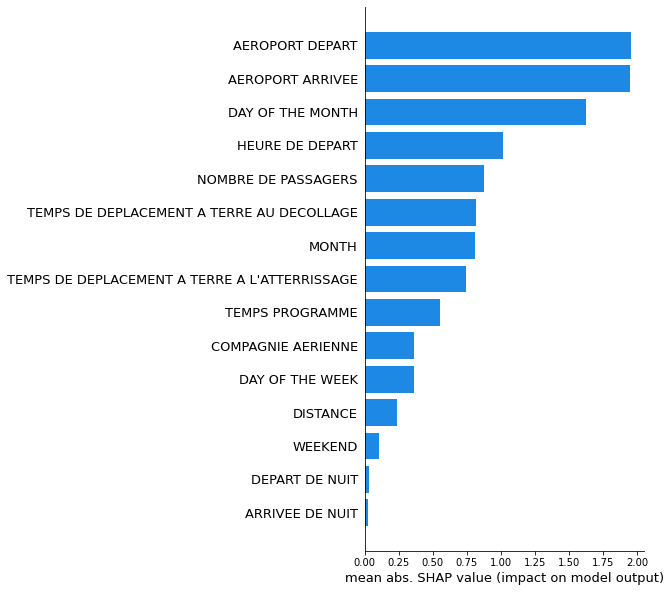

In [120]:
inds = np.argsort(-global_importances)
f = plt.figure(figsize=(5,10))
nb_features = len(global_importances)
y_pos = np.arange(nb_features)
inds2 = np.flip(inds[:nb_features], 0)
plt.barh(y_pos, global_importances[inds2], align='center', color="#1E88E5")
plt.yticks(y_pos, fontsize=13)
plt.gca().set_yticklabels(X_train.columns[inds2])
plt.xlabel('mean abs. SHAP value (impact on model output)', fontsize=13)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

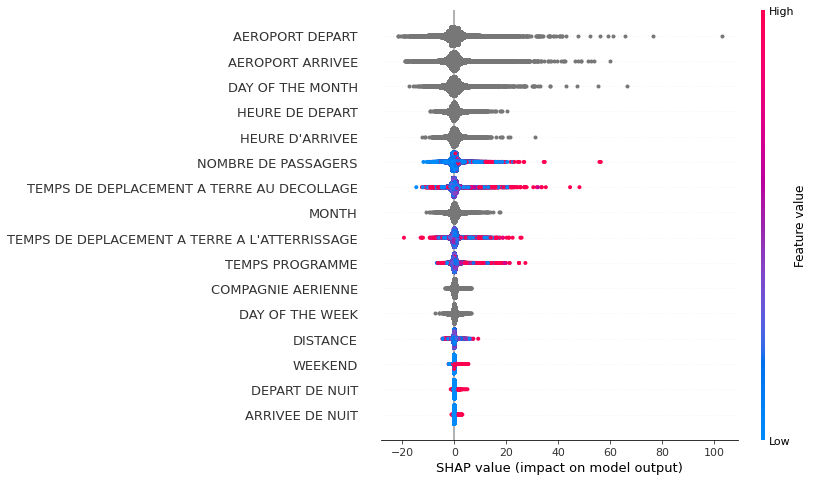

In [121]:
shap.summary_plot(shap_values, X_test_retard)

In [133]:
explainer.expected_value

53.745980349116245

In [131]:
X_test_retard.iloc[0,:].shape

(16,)

In [132]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0], X_test_retard.iloc[0,:])

In [ ]:
shap.plots.force(shap_values[0])

### Visualize many prediction 

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[:1000,:], X_display.iloc[:1000,:])

## Plot the SHAP dependence plots for the top 5 features

Les graphiques de dépendance SHAP montrent l'effet d'une seule feature sur l'ensemble des données. Ils représentent la valeur d'une feature en fonction de la valeur SHAP de cette feature sur de nombreux échantillons. Les diagrammes de dépendance SHAP sont similaires aux diagrammes de dépendance partielle, mais tiennent compte des effets d'interaction présents dans les features, et ne sont définis que dans les régions de l'espace d'entrée supportées par les données. La dispersion verticale des valeurs SHAP pour une seule valeur de feature est due aux effets d'interaction, et une autre feature est choisie pour être colorée afin de mettre en évidence les interactions possibles.

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


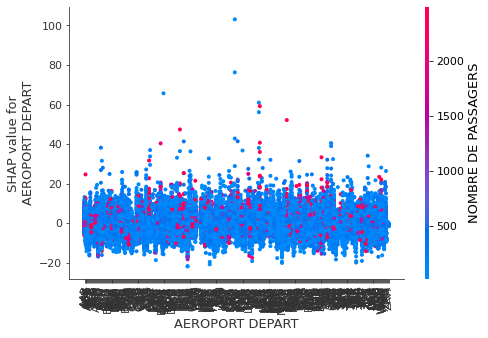

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


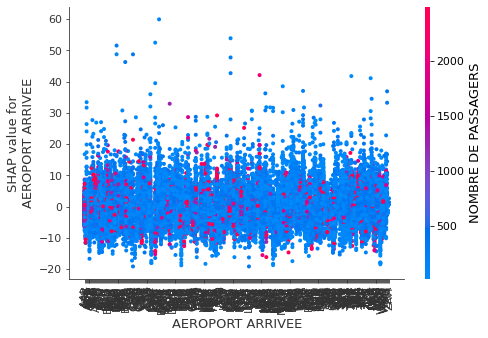

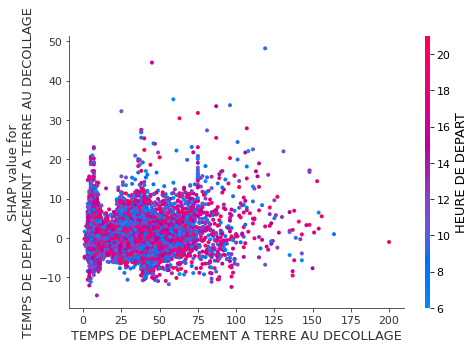

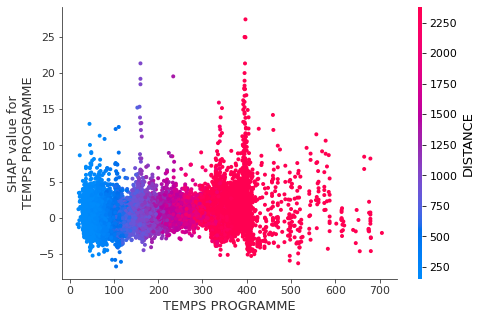

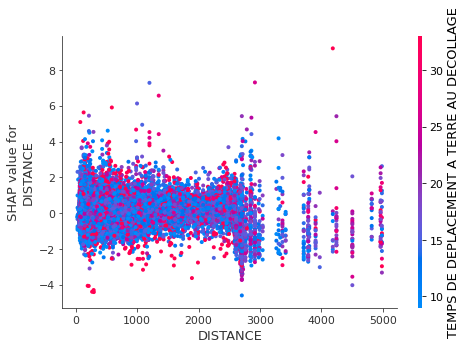

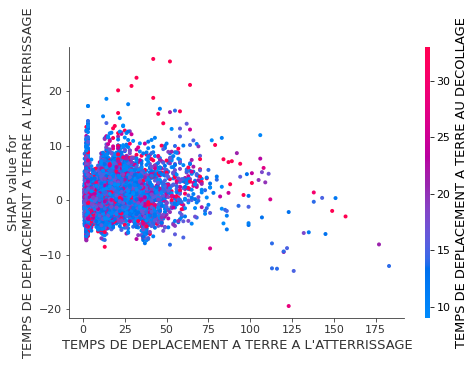

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


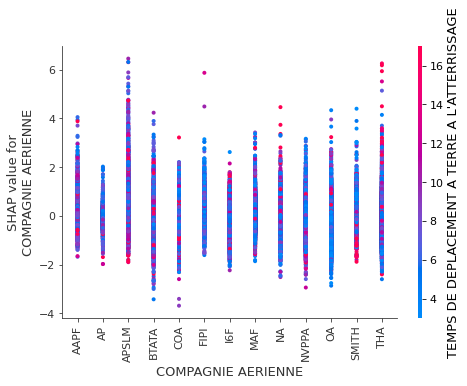

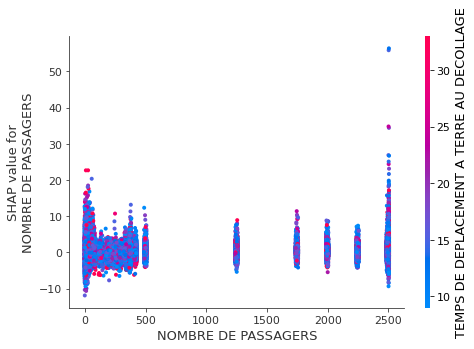

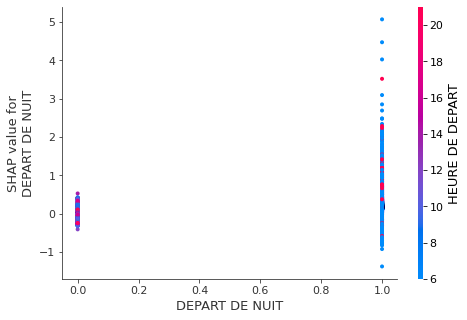

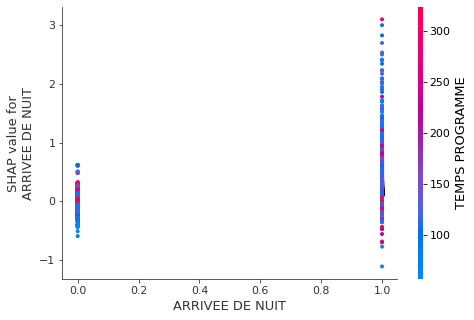

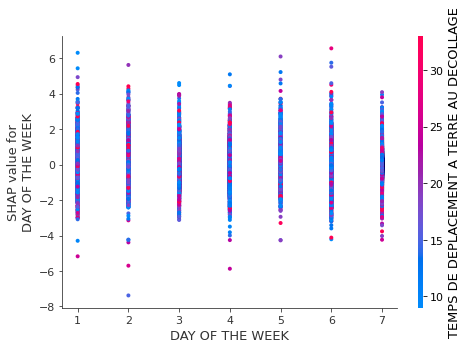

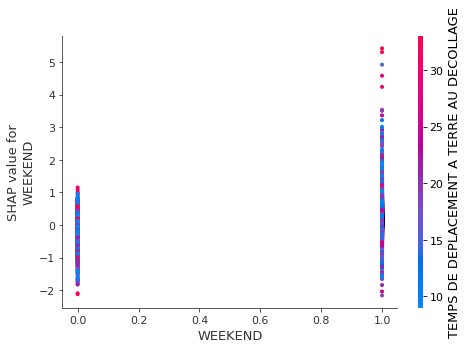

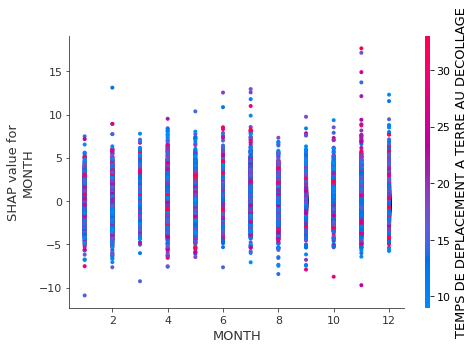

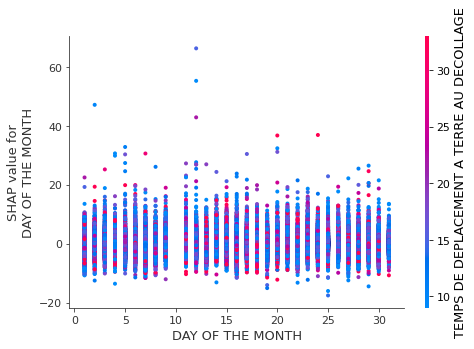

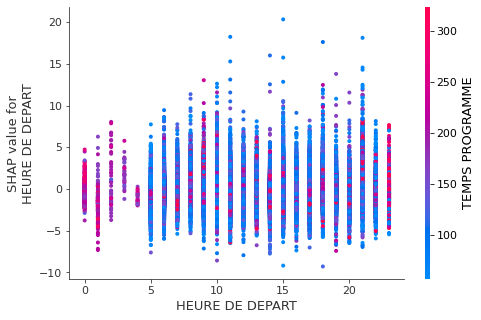

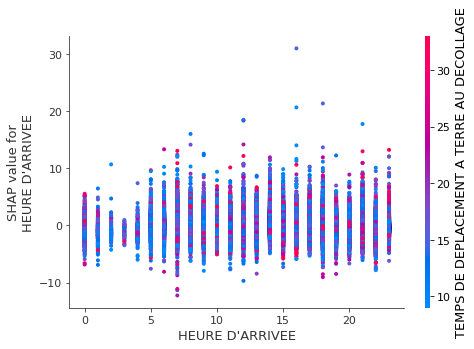

In [134]:
for name in X_test_retard.columns:
    shap.dependence_plot(name, shap_values, X_test_retard)